# The Burman Traveling Salesman Problem 

In [10]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Statistics
from pyevolve import Consts
from pyevolve import Mutators
from pyevolve import DBAdapters

from PIL import Image, ImageDraw, ImageFont

import geopy.distance
import random

In [3]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

coordinates = list(zip(LAT, LON))

In [4]:
def distance(origin, dest):
    """
    Calculate the distance between two lat, long coordinates.

    Parameters
    ----------
    `origin` : tuple of float (lat, long)
    `dest`   : tuple of float (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    origin = (46.5197, 6.6323)  # Lausanne
    destination = (46.2044, 6.1432)  # Geneva
    round(distance(origin, destination), 1)
    51.4
    """
    return geopy.distance.distance(origin, dest).km

In [5]:
def distance_matrix(coord):
    """
    Calculate the distances between all the towns in a list
    
    Parameters
    ----------
    `coord` : List of tuples (lat, long) representing towns
    
    Returns
    -------
    Matrix containing the distances between each town
    """

    matrix = {}
    for i, origin in enumerate(coord):
        for j, dest in enumerate(coord):
            matrix[i, j] = distance(origin, dest)
    return matrix

In [6]:
def fitness(chromosome):
    """
    Fitness function for the genetic algorithm
    """
    global distances
    
    score = 0.0
    
    travel_len = len(chromosome)
    for i in range(travel_len):
        # get index of the next city
        # note: when the src city is the last one in
        #       the chromosome, the next one is the first one.
        #       hence the modulo
        j = (i + 1) % travel_len  
        score += distances[chromosome[i], chromosome[j]]
    return score

In [7]:
def init(genome, **kwargs):
    """
    Init function for the genetic algorithm
    """
    genome.clearList()
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)

    for city in lst:
        genome.append(city)

In [30]:
global distances

distances = distance_matrix(coordinates)

genome = G1DList.G1DList(len(coordinates))

genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.initializator.set(init)

genome.setParams(rangemin=0, rangemax=len(coordinates)-1)

ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(1000)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.8)

ga.setMinimax(Consts.minimaxType['minimize'])

# Record evolution results in a database
ga.setDBAdapter(DBAdapters.DBSQLite(identify="tsp"))

ga.setGenerations(500)

ga.evolve(freq_stats=10)

ga.bestIndividual()

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8059.21(8804.50)/5295.82(4507.81)/6716.01(6716.01)]
Gen. 10 (2.00%): Max/Min/Avg Fitness(Raw)             [4152.77(5823.33)/3427.28(3346.76)/3460.64(3460.64)]
Gen. 20 (4.00%): Max/Min/Avg Fitness(Raw)             [4222.83(6010.10)/3470.35(3346.76)/3519.02(3519.02)]
Gen. 30 (6.00%): Max/Min/Avg Fitness(Raw)             [4151.67(5996.49)/3428.91(3346.76)/3459.73(3459.73)]
Gen. 40 (8.00%): Max/Min/Avg Fitness(Raw)             [4157.37(6101.07)/3433.54(3346.76)/3464.48(3464.48)]
Gen. 50 (10.00%): Max/Min/Avg Fitness(Raw)             [4153.01(6289.42)/3432.93(3346.76)/3460.85(3460.85)]
Gen. 60 (12.00%): Max/Min/Avg Fitness(Raw)             [4154.45(5823.33)/3428.24(3346.76)/3462.04(3462.04)]
Gen. 70 (14.00%): Max/Min/Avg Fitness(Raw)             [4167.90(6254.37)/3441.66(3346.76)/3473.25(3473.25)]
Gen. 80 (16.00%): Max/Min/Avg Fitness(Raw)             [4145.36(7456.48)/3435.87(3346.76)/3454.47(3454.47)]
Gen. 90 (18.00%): Max/Min/Avg Fitn

- GenomeBase
	Score:			 3346.761974
	Fitness:		 3435.149216

	Params:		 {'rangemin': 0, 'rangemax': 14}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: init - Weight: 0.50
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator

    .. note:: this mutator is :term:`Data Type Independent`

    
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverSinglePoint - Weight: 0.50
		Doc:  The crossover of G1DList, Single Point

    .. warning:: You can't use this crossover method for lists with just one element.

    

- G1DList
	List size:	 14
	List:		 [0, 9, 8, 10, 7, 12, 6, 11, 5, 4, 3, 2, 13, 1]


Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
500 generations found !


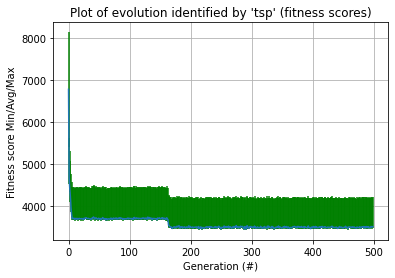

In [29]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/.conda/envs/mlg_ga/bin/pyevolve_graph.py -i tsp -2